In [1]:
import pandas as pd


credit_features_subset = pd.read_csv('/Users/tominguyen/Desktop/Data Analytics/Loan Prediction Model/Data/credit_features_subset.csv')
print(credit_features_subset.head())
print(credit_features_subset.info())

      UID  ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0  216009                     227                        12         14   
1  217537                      49                        10          7   
2  221803                     134                         0         12   
3  222260                     227                         2         39   
4  222848                     132                         2         99   

   ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0               11                            0                         3   
1                6                            1                         3   
2               11                            0                         3   
3               12                            0                         2   
4               11                            8                         0   

   ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                   

In [2]:
loan_data = pd.read_csv('/Users/tominguyen/Desktop/Data Analytics/Loan Prediction Model/Data/loan_applications.csv')
credit_features = pd.read_csv('/Users/tominguyen/Desktop/Data Analytics/Loan Prediction Model/Data/credit_features_subset.csv')

# Merge datasets on the common column (e.g., 'UID')
full_data = pd.merge(loan_data, credit_features, on='UID', how='left')
print(full_data.head())

       UID ApplicationDate  Amount  Term        EmploymentType  \
0  4921736      03/07/2020    2000    60  Employed - full time   
1  1241981      04/02/2020    3000    60  Employed - full time   
2  5751748      02/08/2020   20000    60  Employed - full time   
3  7163425      23/09/2020   20000    60         Self employed   
4   227377      01/01/2020    5000    36  Employed - full time   

              LoanPurpose  Success  ALL_AgeOfOldestAccount  \
0        Unexpected bills        0                     162   
1  Starting new bussniess        0                     266   
2        Business capital        0                      90   
3    New business venture        0                     163   
4                     car        0                     129   

   ALL_AgeOfYoungestAccount  ALL_Count  ALL_CountActive  \
0                        17         18               12   
1                        30         14               10   
2                        52          4               

In [3]:
print(full_data.isnull().sum())


UID                                     0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
dtype: int64


In [4]:
categorical_cols = full_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    full_data[col].fillna(full_data[col].mode()[0], inplace=True)

/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_59160/4189108217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data[col].fillna(full_data[col].mode()[0], inplace=True)


In [5]:
full_data['ApplicationDate'] = pd.to_datetime(full_data['ApplicationDate'], errors='coerce')
full_data['ApplicationDate'].fillna(full_data['ApplicationDate'].mode()[0], inplace=True)

/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_59160/976082662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['ApplicationDate'].fillna(full_data['ApplicationDate'].mode()[0], inplace=True)


In [6]:
print(full_data.isnull().sum())

UID                                     0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
dtype: int64


In [7]:
# Selecting only numeric columns
numeric_cols = full_data.select_dtypes(include=['number'])

# Ensure there are numeric columns to calculate correlation
if numeric_cols.empty:
    print("No numeric columns available for correlation analysis.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_cols.corr()

    # Display the correlation with the 'Success' column
    if 'Success' in correlation_matrix.columns:
        print("Correlation with 'Success':")
        print(correlation_matrix['Success'].sort_values(ascending=False))
    else:
        print("'Success' column not found in numeric data.")

Correlation with 'Success':
Success                                 1.000000
ALL_MeanAccountAge                      0.103557
ALL_AgeOfOldestAccount                  0.074819
ALL_SumCurrentOutstandingBal            0.043025
UID                                     0.042425
ALL_AgeOfYoungestAccount                0.001227
Term                                   -0.010138
ALL_CountSettled                       -0.026158
ALL_CountClosedLast12Months            -0.037209
ALL_Count                              -0.044824
ALL_SumCurrentOutstandingBalExcMtg     -0.058709
ALL_CountActive                        -0.064471
ALL_CountOpenedLast12Months            -0.074136
Amount                                 -0.108800
ALL_CountDefaultAccounts               -0.139361
ALL_WorstPaymentStatusActiveAccounts   -0.179112
ALL_TimeSinceMostRecentDefault               NaN
Name: Success, dtype: float64


In [8]:
full_data = pd.get_dummies(full_data, columns=['EmploymentType', 'LoanPurpose'], drop_first=True)

In [9]:
correlation_matrix = full_data.corr()
print(correlation_matrix['Success'].sort_values(ascending=False))

Success                                 1.000000
ALL_MeanAccountAge                      0.103557
ALL_AgeOfOldestAccount                  0.074819
LoanPurpose_loans                       0.044952
LoanPurpose_car repair                  0.044863
                                          ...   
ALL_CountOpenedLast12Months            -0.074136
Amount                                 -0.108800
ALL_CountDefaultAccounts               -0.139361
ALL_WorstPaymentStatusActiveAccounts   -0.179112
ALL_TimeSinceMostRecentDefault               NaN
Name: Success, Length: 2464, dtype: float64


In [10]:
# Identify features with low correlation to 'Success'
low_correlation_features = correlation_matrix['Success'][abs(correlation_matrix['Success']) < 0.1].index

# Drop these features from the dataset
full_data = full_data.drop(columns=low_correlation_features)

print(f"Dropped features: {low_correlation_features}")

Dropped features: Index(['UID', 'ApplicationDate', 'Term', 'ALL_AgeOfOldestAccount',
       'ALL_AgeOfYoungestAccount', 'ALL_Count', 'ALL_CountActive',
       'ALL_CountClosedLast12Months', 'ALL_CountOpenedLast12Months',
       'ALL_CountSettled',
       ...
       'LoanPurpose_wheelchair  for son', 'LoanPurpose_white goods',
       'LoanPurpose_windows', 'LoanPurpose_work stuff',
       'LoanPurpose_work tools', 'LoanPurpose_work van', 'LoanPurpose_yed',
       'LoanPurpose_yes', 'LoanPurpose_£194',
       'LoanPurpose_Çar tax and insurance'],
      dtype='object', length=2458)


In [11]:
# Define features (X) and target (y)
X = full_data.drop(columns=['Success'])
y = full_data['Success']

# Verify the shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (8847, 5)
Target shape: (8847,)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7077, 5)
Testing set shape: (1770, 5)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [14]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1597
           1       0.31      0.28      0.29       173

    accuracy                           0.87      1770
   macro avg       0.61      0.61      0.61      1770
weighted avg       0.86      0.87      0.86      1770

AUC-ROC Score: 0.7845


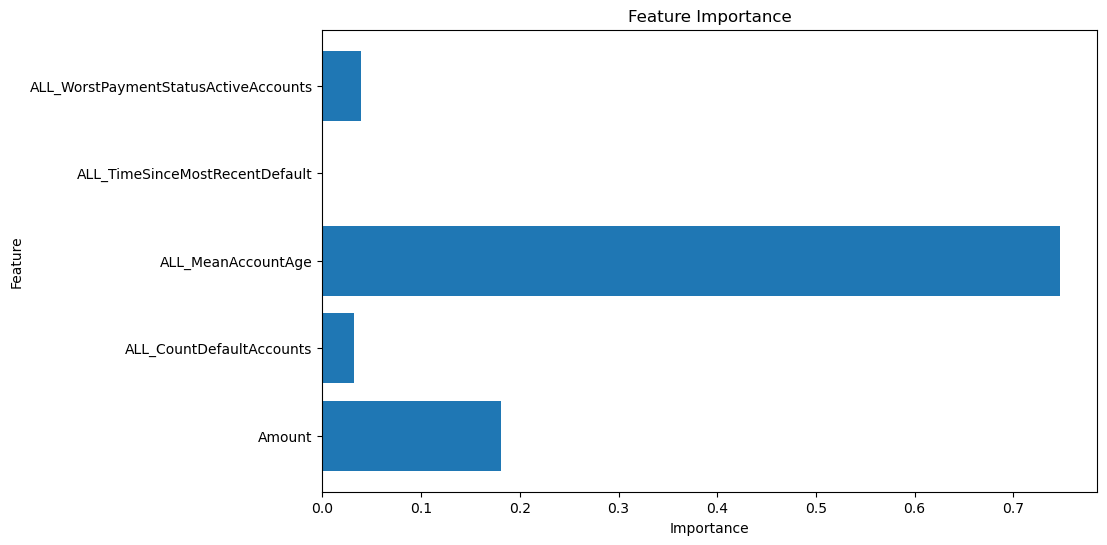

In [15]:
# Feature importance
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [16]:
#Optimisation 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
optimised_model = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total tim

In [18]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_pred = optimised_model.predict(X_test)
y_pred_proba = optimised_model.predict_proba(X_test)[:, 1]

# Classification report
print("Optimised Model - Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Optimised Model - AUC-ROC Score: {auc_score:.4f}")

Optimised Model - Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1597
           1       0.00      0.00      0.00       173

    accuracy                           0.90      1770
   macro avg       0.45      0.50      0.47      1770
weighted avg       0.81      0.90      0.86      1770

Optimised Model - AUC-ROC Score: 0.8470


/opt/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
import joblib

# Save the model
joblib.dump(optimised_model, '/Users/tominguyen/optimised_loan_success_model.pkl')
print("Optimised model saved as 'optimised_loan_success_model.pkl'")

Optimised model saved as 'optimised_loan_success_model.pkl'
